<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Web-scraping" data-toc-modified-id="Web-scraping-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Web scraping</a></span><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Phantomjs-as-a-headless-browser" data-toc-modified-id="Phantomjs-as-a-headless-browser-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Phantomjs as a headless browser</a></span></li><li><span><a href="#Scrap-with-prettify" data-toc-modified-id="Scrap-with-prettify-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Scrap with prettify</a></span></li><li><span><a href="#Pattern-of-lowest-price" data-toc-modified-id="Pattern-of-lowest-price-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Pattern of lowest price</a></span></li><li><span><a href="#Example-to-find-height" data-toc-modified-id="Example-to-find-height-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Example to find height</a></span></li><li><span><a href="#Saving-heights" data-toc-modified-id="Saving-heights-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Saving heights</a></span></li></ul></li></ul></div>

# Web scraping

## Import modules

In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

## Phantomjs as a headless browser

In [2]:
url ="https://www.google.com/flights/explore/#explore;f=ORD;t=r-Europe-0x46ed8886cfadda85%253A0x72ef99e6b3fcf079;li=9;lx=14;d=2018-02-03"
driver = webdriver.PhantomJS()
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap,service_args=['--ignore-ssl-errors=true'])
driver.implicitly_wait(20)
driver.get(url)


C:\Users\mohammad\Anaconda3\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


## Scrap with prettify

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="baseUrl=/flights/explore//static/" name="deals::gwt:property"/>
  <title>
   Explore flights
  </title>
  <meta content="Explore flights" name="description"/>
  <script async="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.QiBse7P5SjM.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/am=AAE/rs=AHpOoo9jYrE1LfQSZTrVx2QGL0mG9OVMow/cb=gapi.loaded_0">
  </script>
  <script language="javascript" type="text/javascript">
   var __JS_ILT__ = new Date();
  </script>
  <style type="text/css">
   .gb_5a{background:white;height:100%;position:fixed;right:0;top:0;width:420px;z-index:1001}.gb_6a.gb_5a{left:0;min-height:400px;top:64px;width:initial}.gb_5a>button:only-of-type{background:url('https://www.gstatic.com/images/icons/material/system/1x/close_grey600_24dp.png');background-position:center;border-width:0;cursor:pointer;font-size:24px
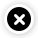
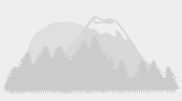

In [3]:
s = BeautifulSoup(driver.page_source, "lxml")
print(s.prettify())

## Pattern of lowest price

In [4]:
bp = s.findAll('div', class_='CTPFVNB-w-e')
bp

[<div class="CTPFVNB-w-e" style="top: 65.9830357030493px;">$300</div>,
 <div class="CTPFVNB-w-e" style="top: 58.8508177518127px;">$300</div>,
 <div class="CTPFVNB-w-e" style="top: 62.100084053063064px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 53.92289128769815px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 65.32519187358916px;">$340</div>,
 <div class="CTPFVNB-w-e" style="top: 48.49896023042844px;">$420</div>,
 <div class="CTPFVNB-w-e" style="top: 57.76943915343915px;">$430</div>,
 <div class="CTPFVNB-w-e" style="top: 53.09488829331279px;">$460</div>,
 <div class="CTPFVNB-w-e" style="top: 37.18193991694959px;">$480</div>,
 <div class="CTPFVNB-w-e" style="top: 44.373703005340715px;">$552</div>,
 <div class="CTPFVNB-w-e" style="top: 32.252950546211636px;">$555</div>,
 <div class="CTPFVNB-w-e" style="top: 39.06737279005682px;">$557</div>,
 <div class="CTPFVNB-w-e" style="top: 41.55695477962222px;">$563</div>,
 <div class="CTPFVNB-w-e" style="top: 39.77702872227859px;">$57

In [5]:
for index, i in enumerate(bp):
    a=bp[index].text
    a=a[1:]
    bp[index]=int(a)

In [6]:
bp

[300, 300, 340, 340, 340, 420, 430, 460, 480, 552, 555, 557, 563, 573, 574]

## Example to find height

In [7]:
height_bp= s.find('div', class_='CTPFVNB-w-f' )
height_bp['style']

'left: 96px; height: 40.016964296950704px;'

In [8]:
a=height_bp['style'].split('height: ')[1].split('px')[0]

In [9]:
a

'40.016964296950704'

In [10]:
height_bp= s.find('div', class_='CTPFVNB-w-x CTPFVNB-w-f', )['style'].split('height: ')[1].split('px')[0]
height_bp

'40.016964296950704'

## Saving heights

In [11]:
height_bp= s.findAll('div', class_='CTPFVNB-w-f' )
for index, i in enumerate(height_bp) :
    height_bp[index]=float(i['style'].split('height: ')[1].split('px')[0])
height_bp    

[40.016964296950704,
 47.1491822481873,
 43.899915946936936,
 52.07710871230185,
 40.67480812641084,
 57.50103976957156,
 48.23056084656085,
 52.90511170668721,
 68.81806008305041,
 61.626296994659285,
 73.74704945378836,
 66.93262720994318,
 64.44304522037778,
 66.22297127772141,
 50.87911222780569]

In [12]:
k=np.array(bp)/np.array(height_bp)
k

array([  7.49682054,   6.36278268,   7.74488954,   6.52878027,
         8.35898227,   7.30421574,   8.91550901,   8.694812  ,
         6.97491326,   8.95721513,   7.52572481,   8.32180094,
         8.73639658,   8.65258669,  11.28164339])

In [13]:
cities= s.findAll('span', class_='CTPFVNB-v-c')
for index, i in enumerate(cities):
    cities[index]=i.text.split(',')[0]
cities  

['Dublin',
 'Copenhagen',
 'Paris',
 'Amsterdam',
 'London',
 'Stockholm',
 'Edinburgh',
 'Barcelona',
 'Frankfurt',
 'Warsaw',
 'Budapest',
 'Moscow',
 'Zagreb',
 'Athens',
 'Naples']

In [14]:
# first city
fares=s.findAll('div', elt='graph')[0].findAll('div', class_='CTPFVNB-w-x')
l=[]
for i in fares:
    l.append(float(i['style'].split('height:')[1].split('px')[0]))
    

In [15]:
prices=[]
for index, i in enumerate(fares):
    a=(l[index]/height_bp[0])*bp[0]
    prices.append(a)

In [16]:
prices

[627.5518367891193,
 590.5493699579973,
 410.00733382225485,
 588.0392026135077,
 590.5493699579973,
 617.5511700780052,
 610.5507033802254,
 600.5500366691114,
 617.5511700780052,
 617.5511700780052,
 430.0086672444829,
 601.230082005467,
 641.2327488499235,
 641.2327488499235,
 708.357223814921,
 586.229081938796,
 300.0,
 586.229081938796,
 586.229081938796,
 586.229081938796,
 490.0126675111674,
 600.5500366691114,
 586.229081938796,
 586.229081938796,
 380.0053336889126,
 430.0086672444829,
 617.5511700780052,
 440.00933395559707,
 600.5500366691114,
 440.00933395559707,
 460.01066737782514,
 586.229081938796,
 590.0193346223082,
 627.5518367891193,
 654.5536369091272,
 627.5518367891193,
 601.230082005467,
 586.229081938796,
 490.0126675111674,
 601.230082005467,
 697.7665177678512,
 590.0393359557304,
 588.0392026135077,
 586.229081938796,
 586.229081938796,
 630.0220014667643,
 646.6531102073471,
 680.045336355757,
 794.6629775318355,
 698.6565771051404,
 592.6495099673311,
 61

In [18]:
df=pd.DataFrame(prices, columns=['Price'])
df

,Price
0,627.551837
1,590.549370
2,410.007334
3,588.039203
4,590.549370
5,617.551170
6,610.550703
7,600.550037
8,617.551170
9,617.551170


Text(0,0.5,'Price')

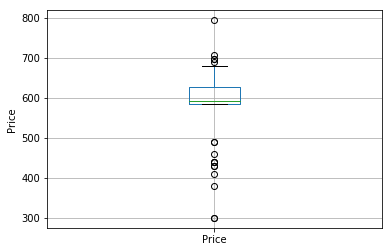

In [19]:
fig=df.boxplot(column='Price')
fig.set_ylabel('Price')

Text(0,0.5,'Price')

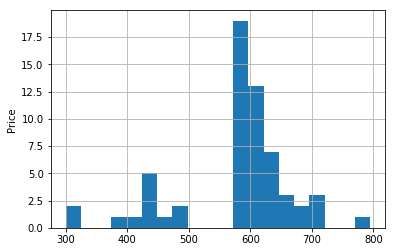

In [21]:
fig=df['Price'].hist(bins=20)
fig.set_ylabel('Price')

In [22]:
df.describe()

,Price
count,60.000000
mean,579.328622
std,93.948270
min,300.000000
25%,586.229082
50%,592.649510
75%,627.551837
max,794.662978


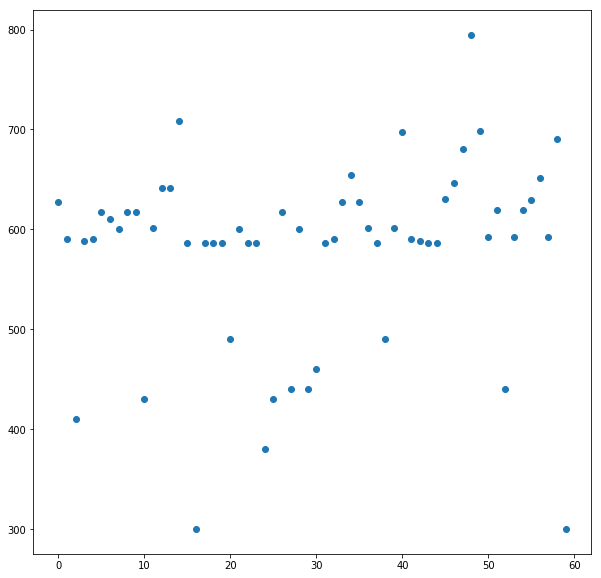

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(np.arange(len(df['Price'])),df['Price'])

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()
scaler.fit(df[['Price']]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
db = DBSCAN(eps=.5, min_samples=1).fit(scaler.transform(df[['Price']]))

In [31]:
db.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

In [33]:
number_lb=set(db.labels_)
number_lb

{0, 1, 2, 3}

In [34]:
color=plt.cm.Spectral(np.linspace(0, 1, len(number_lb)))
color

array([[ 0.61960784,  0.00392157,  0.25882353,  1.        ],
       [ 0.99346405,  0.74771242,  0.43529412,  1.        ],
       [ 0.74771242,  0.89803922,  0.62745098,  1.        ],
       [ 0.36862745,  0.30980392,  0.63529412,  1.        ]])

In [39]:

df1=df.reset_index()
df1['labels']=db.labels_
df1.head()

,index,Price,labels
0,0,627.551837,0
1,1,590.549370,0
2,2,410.007334,1
3,3,588.039203,0
4,4,590.549370,0


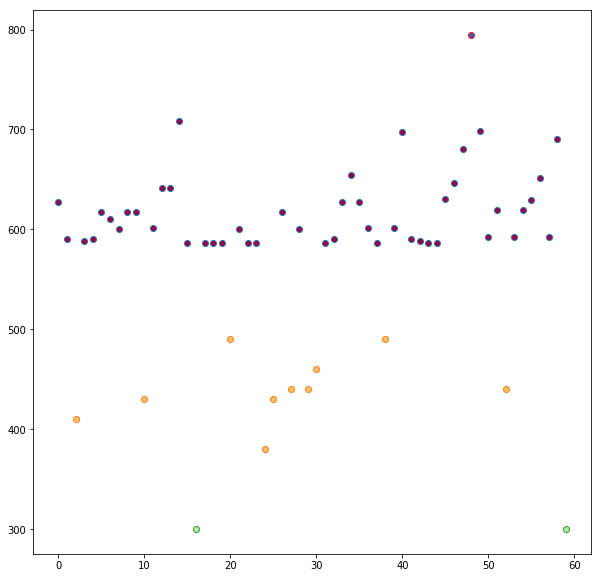

In [42]:
plt.subplots(figsize=(10,10))
for l, c in zip(number_lb, color):
    # extracting the indexes
    df2=df1[df1['labels']==l]
    plt.plot(df2.iloc[:,0], df2.iloc[:,1],  'o', markerfacecolor=c)
    

In [45]:
df1.groupby('labels')